# Quantum Support Vector Machines (QSVM)

Support Vector Machines (SVM) are a popular classical machine learning algorithm used for classification tasks. The goal of an SVM is to find the optimal hyperplane that separates data points of different classes with the maximum margin. In higher-dimensional feature spaces, SVMs are able to create nonlinear decision boundaries using kernel methods.

In Quantum Support Vector Machines (QSVM), the idea is to leverage the unique capabilities of quantum computers to perform kernel-based classification more efficiently, particularly for datasets that might be difficult to separate using classical methods.

### Classical SVM Recap:

1. Linear Separability:
 - In SVM, we try to find a hyperplane that separates two classes of data in the feature space. If the data is linearly separable, the SVM can directly find a hyperplane that maximizes the margin between the two classes.
2. Kernel Trick:
 - When the data is not linearly separable, the SVM uses the kernel trick to map the data into a higher-dimensional space where it becomes linearly separable. Kernels like the polynomial kernel or radial basis function (RBF) kernel are commonly used for this.
 - The kernel function computes the dot product of the data points in the higher-dimensional space without having to explicitly calculate the transformation, which makes it computationally efficient.

### Quantum Support Vector Machines (QSVM)

In a QSVM, the goal is similar: to classify data points using quantum-enhanced kernel methods. However, the quantum version differs in a few significant ways by exploiting quantum computing for more complex or computationally hard kernel calculations. QSVMs can outperform classical SVMs when the data or the kernel mapping becomes computationally intensive for classical algorithms.

### How QSVM Works:
1. Data Encoding (Quantum Feature Map):

 - Classical data points are encoded into quantum states using a quantum feature map.
2. Quantum Kernel Computation:

 - The quantum computer evaluates the similarity between pairs of quantum states (data points) to compute the quantum kernel matrix.
3. Classical Optimization:

 - The kernel matrix is passed to a classical optimizer, which solves the SVM optimization problem and identifies the support vectors.
4. Prediction:

 - After training, predictions are made using the learned model and the quantum kernel.

### Advantages of QSVM:
1. Efficient Kernel Calculation:

 - Quantum computers can compute certain kernel functions more efficiently than classical algorithms, particularly for high-dimensional feature spaces.
2. Exponential Feature Spaces:

 - Quantum computers can map classical data to exponentially large feature spaces, potentially leading to better classification for complex datasets.
3. Potential for Quantum Speedup:

 - QSVMs can outperform classical SVMs for problems where the kernel calculation is computationally hard for classical systems.

### Limitations of QSVM:
1. Noise and Scalability:
 - Current quantum computers (NISQ devices) are noisy and have limitations in terms of qubit count and gate fidelity, which can affect the performance of QSVMs on larger datasets.
2. Limited Datasets:
 - QSVMs have so far been demonstrated mainly on small, simple datasets due to the limitations of existing quantum hardware.

### Example: QSVM with the Iris Dataset

The Iris dataset is a well-known classical dataset used for classification tasks. The goal is to classify iris flowers into three species (Setosa, Versicolor, Virginica) based on their sepal and petal lengths and widths.

Using Qiskit’s machine learning module, we can implement a QSVM to classify the Iris dataset.

The process would be:

 - Load and preprocess the Iris dataset.
 - Define a quantum feature map to encode the classical data as quantum states.
 - Train the QSVM using the quantum kernel.
 - Evaluate the classification performance.

### Step 1: Load and Preprocess the Iris Dataset
The Iris dataset contains 150 samples with 4 features each (sepal length, sepal width, petal length, petal width). The goal is to classify the flowers into one of three species. For simplicity, we'll focus on classifying two species: Setosa and Versicolor.

In [35]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = datasets.load_iris()

# We will use only two classes for binary classification: Setosa and Versicolor
# The first 100 samples correspond to these two classes
X = iris.data[:100]  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target[:100]  # Labels (0 for Setosa, 1 for Versicolor)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


### Step 2: Define the Quantum Feature Map
The quantum feature map is used to map classical data points into quantum states. We’ll use the ZZFeatureMap, which encodes the data points using rotations around the Z-axis of qubits, and entangles the qubits to create more complex features.

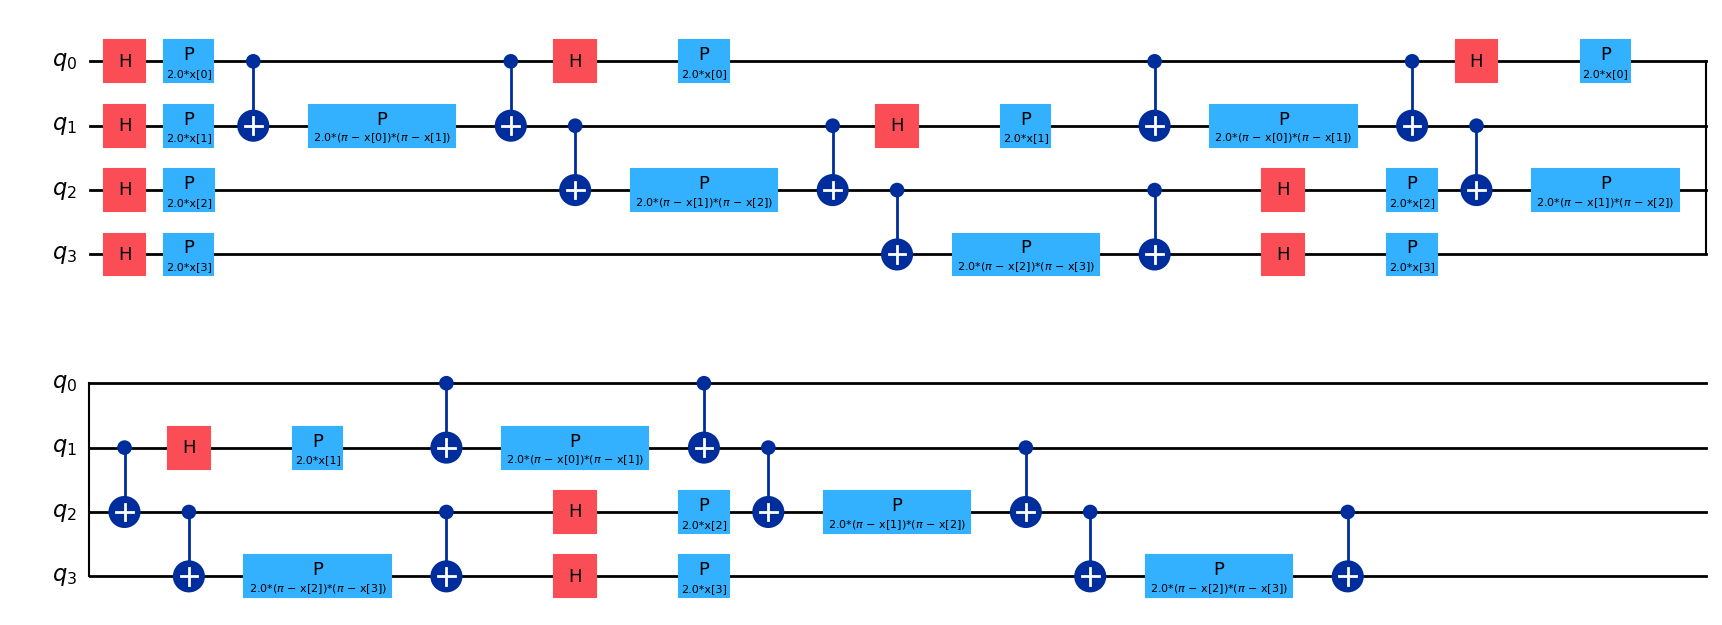

In [36]:
from qiskit.circuit.library import ZZFeatureMap

# Define the quantum feature map
feature_map = ZZFeatureMap(feature_dimension=4, reps=3, entanglement='linear')

# Visualize the feature map circuit
feature_map.decompose().draw('mpl')

- feature_dimension=4: Since the Iris dataset has 4 features, we use 4 qubits to represent each data point.
- reps=2: This defines the number of repetitions of the feature map.
- entanglement='linear': The qubits are entangled in a linear fashion.

### Step 3: Train the QSVM Model
Qiskit’s QSVC (Quantum Support Vector Classifier) uses a quantum kernel to compute the similarity between data points in the quantum feature space. We'll train it on the training set and test it on the test set.

In [40]:
from qiskit_machine_learning.algorithms import QSVC
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import Sampler
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_algorithms.state_fidelities import ComputeUncompute

# Use Aer's qasm_simulator for the quantum instance
simulator = AerSimulator()

# Define the Quantum Kernel with the feature map and sampler
sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)
quantum_kernel = FidelityQuantumKernel(feature_map=feature_map, fidelity=fidelity)

# Create the QSVM (Quantum SVM) classifier
qsvc = QSVC(quantum_kernel=quantum_kernel)

# Fit the QSVM model to the training data
qsvc.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = qsvc.predict(X_test)


### Step 4: Evaluate the QSVM Model
Finally, we evaluate the performance of the QSVM by calculating the accuracy of the model on the test set.

In [41]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the QSVM on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"QSVM Accuracy: {accuracy * 100:.2f}%")


QSVM Accuracy: 85.00%


### Classical Comparison:
Quantum kernels and quantum machine learning algorithms don’t always outperform classical algorithms for small or simple datasets. It's helpful to compare the QSVM’s performance against a classical SVM on the same dataset to see how much quantum advantage (if any) we're getting.

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train a classical SVM using a linear kernel
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

# Predict on the test set
y_pred_classical = svc.predict(X_test)

# Calculate accuracy
classical_accuracy = accuracy_score(y_test, y_pred_classical)
print(f"Classical SVM Accuracy: {classical_accuracy * 100:.2f}%")


Classical SVM Accuracy: 100.00%
